In [1]:
import pandas as pd 
import numpy as np 
import statistics

import the data into the notebook

In [2]:
df = pd.read_csv('/Users/liuyangshan/Desktop/mapdata.csv', header = 0)

In [3]:
df.head()

,PostalCode,Borough,Neighborhood
0,M4N,Central Toronto,Lawrence Park
1,M5N,Central Toronto,Roselawn
2,M4P,Central Toronto,Davisville North
3,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
4,M4R,Central Toronto,"North Toronto West, Lawrence Park"


In [4]:
df2 = pd.read_csv('/Users/liuyangshan/Desktop/Geospatial_Coordinates2.csv')

check how the data looks like

In [5]:
df2

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


merge the data by postal code

In [6]:
dfm = df.merge(df2, on=['PostalCode'])

In [7]:
dfm

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
4,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
...,...,...,...,...,...
98,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
99,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
100,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
101,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262


In [8]:
!pip install geopandas

In [9]:
import geopandas as gpd           # importing geopandas
import matplotlib.pyplot as plt

In [10]:
import folium

In [11]:
borough = dfm.iloc[:,1]
latitude = dfm.iloc[:,3]
longtitude = dfm.iloc[:,4]

In [12]:
toronto_map = folium.Map(location = [43.651070, -79.347015], zoom_start = 10)
dots = folium.map.FeatureGroup()
dots.add_child(folium.features.CircleMarker([43.728020,-79.388790],radius = 2,color = 'Red',fill_color = 'Red'))
toronto_map.add_child(dots)
folium.Marker([43.728020,-79.388790],popup = 'Central Toronto').add_to(toronto_map)
toronto_map


In [13]:
toronto_map = folium.Map(location = [43.651070, -79.347015], zoom_start = 10)
dots = folium.map.FeatureGroup()
for i in range(103): 
    dots.add_child(folium.features.CircleMarker([latitude[i],longtitude[i]],radius = 2,color = 'Red',fill_color = 'Red'))
    toronto_map.add_child(dots)
    folium.Marker([latitude[i],longtitude[i]],popup = str(borough[i])).add_to(toronto_map)
    
toronto_map

In [14]:
import requests # library to handle requests
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [15]:
CLIENT_ID = 'GQOY1N5R01CXNC3DNHLHD4FPKMJHT3VSM2E00CG32YCIJCFQ' # your Foursquare ID
CLIENT_SECRET = 'MOWDNB1MQ4O4BRLC0GSSGD0VBD4L33K0HDKJZT4MUG0VKER1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GQOY1N5R01CXNC3DNHLHD4FPKMJHT3VSM2E00CG32YCIJCFQ
CLIENT_SECRET:MOWDNB1MQ4O4BRLC0GSSGD0VBD4L33K0HDKJZT4MUG0VKER1


In [16]:
address = '15 Grenville St, Toronto, ON'
# '102 North End Ave, New York, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.661820727272726 -79.38441163636364


In [17]:
search_query = 'coffee'
radius = 500
print(search_query + ' .... OK!')

coffee .... OK!


In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=GQOY1N5R01CXNC3DNHLHD4FPKMJHT3VSM2E00CG32YCIJCFQ&client_secret=MOWDNB1MQ4O4BRLC0GSSGD0VBD4L33K0HDKJZT4MUG0VKER1&ll=43.661820727272726,-79.38441163636364&v=20180604&query=coffee&radius=500&limit=30'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f910d42a106903c94d99686'},
 'response': {'venues': [{'id': '4bce5e21cc8cd13a7359c4cf',
    'name': "Timothy's World Coffee",
    'location': {'address': '444 Yonge St',
     'crossStreet': 'in College Park',
     'lat': 43.66046739684086,
     'lng': -79.38465356826782,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.66046739684086,
       'lng': -79.38465356826782}],
     'distance': 151,
     'postalCode': 'M5B 2H4',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['444 Yonge St (in College Park)',
      'Toronto ON M5B 2H4',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1603341634',
    'hasPe

In [20]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()
# dataframe.loc[:,'location.distance']

/Users/liuyangshan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4bce5e21cc8cd13a7359c4cf,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1603341634,False,444 Yonge St,in College Park,43.660467,-79.384654,"[{'label': 'display', 'lat': 43.66046739684086...",151,M5B 2H4,CA,Toronto,ON,Canada,"[444 Yonge St (in College Park), Toronto ON M5...",NaN,NaN
1,4b156e98f964a520cbac23e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1603341634,False,801 Bay St,at College St,43.660714,-79.385491,"[{'label': 'display', 'lat': 43.66071353922905...",150,M5S 1Y9,CA,Toronto,ON,Canada,"[801 Bay St (at College St), Toronto ON M5S 1Y...",NaN,NaN
2,5db70a0c306d6b000861ac9f,Neo Coffee Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1603341634,False,770 Bay Street Unit 3,NaN,43.660140,-79.385870,"[{'label': 'display', 'lat': 43.66014, 'lng': ...",220,M5G 0A6,CA,Toronto,ON,Canada,"[770 Bay Street Unit 3, Toronto ON M5G 0A6, Ca...",NaN,NaN
3,56b2d97f498ebb2041ae6502,Coffee Place,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1603341634,False,800 Bay St,NaN,43.661150,-79.386199,"[{'label': 'display', 'lat': 43.66115042330168...",162,M5S 3A9,CA,Toronto,ON,Canada,"[800 Bay St, Toronto ON M5S 3A9, Canada]",NaN,NaN
4,590a649bdee77071100a6a15,Coffee Island,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1603341634,False,925 Bay street,NaN,43.664271,-79.386972,"[{'label': 'display', 'lat': 43.66427089680226...",341,M5S 3L6,CA,Toronto,ON,Canada,"[925 Bay street, Toronto ON M5S 3L6, Canada]",NaN,NaN


In [21]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

# len(dataframe_filtered)

# statistics.mean(dataframe_filtered.loc['distance'])

statistics.mean(dataframe_filtered.loc[:,'distance'])
# dataframe_filtered.iloc[:,7]
s =len(dataframe_filtered)
p =[]
p.append(s)
p

[18]

In [22]:
dataframe_filtered.name

0     Timothy's World Coffee
1     Timothy's World Coffee
2             Neo Coffee Bar
3               Coffee Place
4              Coffee Island
5              Hailed Coffee
6              Coffee Public
7             800 Coffee Bar
8             Mos Mos Coffee
9                Coffee time
10            Bulldog Coffee
11    Zavida Coffee Roasters
12            Jimmy's Coffee
13     Reunion Island Coffee
14               Snap Coffee
15    Fresh Start Coffee Co.
16                 Starbucks
17               Tim Hortons
Name: name, dtype: object

In [23]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [24]:
dfm['Borough'].value_counts().to_frame() # check how many 

,Borough
North York,24
Downtown Toronto,19
Scarborough,17
Etobicoke,12
Central Toronto,9
West Toronto,6
York,5
East York,5
East Toronto,5
Mississauga,1


In [25]:
countlist = dfm['Borough'].value_counts().to_frame()


In [26]:
Downtown_Toronto = '15 Grenville St, Toronto, ON'
North_York = '4986 Yonge St, North York, ON'
Scarborough = '1133 Markham Rd, Scarborough, ON'
Etobicoke = '1255 The Queensway, Etobicoke, ON'
Central_Toronto = '2300 Yonge St, Toronto, ON'
West_Toronto = '3048 Dundas St W, Toronto, ON'
East_Toronto = '1577 Danforth Ave, Toronto, ON'
East_York = '520 Cosburn Ave, East York, ON'
York = '1818 Eglinton Ave W, York, ON'
Mississauga = '4120 Dixie Rd, Mississauga, ON'

In [27]:
# first create a list of regions 
locations = [North_York,Downtown_Toronto,Scarborough,Etobicoke,Central_Toronto,West_Toronto,East_Toronto,East_York,York,Mississauga]

regions = ['North_York','Downtown_Toronto','Scarborough','Etobicoke','Central_Toronto','West_Toronto','East_Toront','East_York','York','Mississauga']
places = ['coffee','supermarket','cinema','restaurant']

len(locations)

10

In [28]:
regions_data = {}
for i in range(10): 
    
    l = []
    for j in places: 

        address = locations[i]
        # '102 North End Ave, New York, NY'
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude

        search_query = j
        radius = 1000

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        # keep only columns that include venue name, and anything that is associated with location
        l.append(len(dataframe))   
        
    regions_data[regions[i]] = l

/Users/liuyangshan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [29]:
regions_data

{'North_York': [9, 2, 1, 13],
 'Downtown_Toronto': [30, 4, 7, 30],
 'Scarborough': [3, 2, 0, 9],
 'Etobicoke': [0, 1, 2, 2],
 'Central_Toronto': [17, 1, 1, 25],
 'West_Toronto': [6, 0, 2, 8],
 'East_Toront': [13, 5, 1, 27],
 'East_York': [0, 1, 0, 5],
 'York': [1, 0, 0, 17],
 'Mississauga': [1, 0, 0, 3]}

In [30]:
regiondf = pd.DataFrame(regions_data, columns = regions, index=places)

In [31]:
regiondf

,North_York,Downtown_Toronto,Scarborough,Etobicoke,Central_Toronto,West_Toronto,East_Toront,East_York,York,Mississauga
coffee,9,30,3,0,17,6,13,0,1,1
supermarket,2,4,2,1,1,0,5,1,0,0
cinema,1,7,0,2,1,2,1,0,0,0
restaurant,13,30,9,2,25,8,27,5,17,3


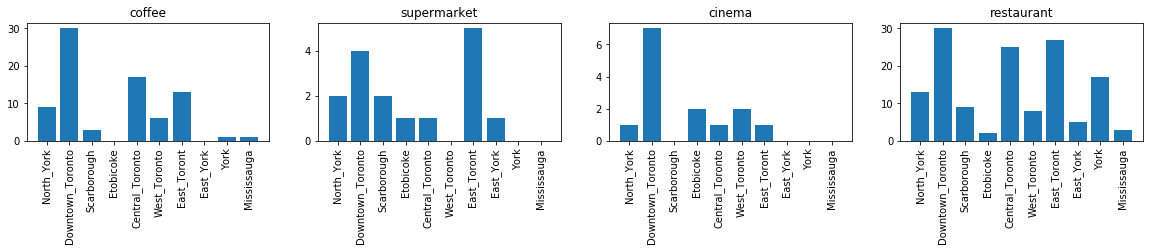

In [32]:
fig = plt.figure(figsize = (20,10))
for i in range(4):
    ax = fig.add_subplot(4,4,i+1)
    plt.bar(regions,regiondf.iloc[i,:])
    plt.xticks(regions,regions, rotation = 90)
    plt.title(places[i])

In [33]:
# compare the similarities with west toronto 
similarity = {}
for i in range(10): 
    s = 0
    for j in range(4):
        s = s + (regiondf.iloc[j,i] - regiondf.iloc[j,5]) ** 2
    similarity[regions[i]] = 300 - s / 4 
    

In [34]:
similarity

{'North_York': 290.25,
 'Downtown_Toronto': 24.75,
 'Scarborough': 295.5,
 'Etobicoke': 281.75,
 'Central_Toronto': 197.0,
 'West_Toronto': 300.0,
 'East_Toront': 191.0,
 'East_York': 287.5,
 'York': 272.5,
 'Mississauga': 286.5}

In [35]:
# so we can see that north york has the highest similarity and geographcially north york is closer to the east side of toronto 
# hence he should move to north york. 